<!--
 * @Author: TMJ
 * @Date: 2024-02-01 20:58:56
 * @LastEditors: TMJ
 * @LastEditTime: 2024-02-02 19:37:48
 * @Description: 请填写简介
-->
# 读取文件

MolOP 提供了一种读取文件的简便方法。

```python
from molop import AutoParser
files = AutoParser("path/to/file")
```

`path/to/file`是文件路径的通配符。例如，使用 `path/to/*.log` 可以读取 `path/to/` 目录中的所有 g16log 文件。

In [1]:
from molop import AutoParser

files = AutoParser("../../tests/test_files/mix_format/*.log")  # path/to/file

MolOP parsing with single thread: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
0 files failed to parse, 3 successfully parsed


如果传递的文件超过 CPU 内核，文件读取过程可自动并行化。

## FileParserBatch

`files`是一个`FileParserBatch`对象，其中包含一系列`FileParser`对象。 因此，您可以通过索引访问每个文件，例如`files[i]`。

In [2]:
print(type(files))
print(type(files[0]))

<class 'molop.io.file_batch.FileParserBatch'>
<class 'molop.io.qm_file.g16log_parser.G16LOGParser'>


## FileParser
MolOP 提取文件中的所有帧，并将其存储在一个包含一系列`BlockParser`对象的`FileParser`对象中。因此，你可以按索引访问每个帧，如 `files[i][j]`。


In [3]:
print(type(files[0][0]))

<class 'molop.io.qm_file.G16LOGBlockParser.G16LOGBlockParser'>


## BlockParser
每个帧都是一个分子，包含 `coordinates`、"原子 "等基本信息（对于 QM 文件，您还可以获得 "能量"、"轨道 "等其他信息）。
Each frame is a certain molcule with basic information like `coordinates`, `atoms` et. al. (For QM files, you can also get other information like `energy`, `orbital` et. al.)

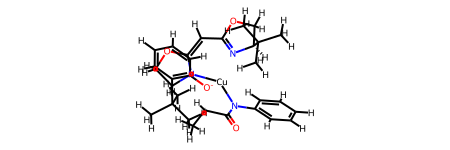

In [4]:
files[0][0].rdmol

In [5]:
files[0][0].energy

-1828.255625 <Unit('hartree / particle')>